<a href="https://colab.research.google.com/github/Yassine-Feki/M-moire-ESG-EV-EBITDA-/blob/main/Automobiles_et_composants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm



In [6]:
# Upload du fichier
uploaded = files.upload()

Saving Automobiles et composants .xlsx to Automobiles et composants  (2).xlsx


In [8]:
fichier = list(uploaded.keys())[0]
df = pd.read_excel(fichier)
display(df)

,Name,Country,Market Cap,Revenues,EV,EBITDA,EV/EBITDA,ESG Score,Norm rating,alpha,ESG EV/EBITDA
0,Renault SA,France,13708.0,48195.0,59912.0,5430.0,11.00,41.0,-0.4950,0.246,9.70
1,Aptiv,Ireland,19347.0,18662.0,25061.0,2661.0,9.40,40.0,-0.5410,0.223,8.30
2,Volkswagen,Germany,58665.0,269549.0,270281.0,31791.0,8.50,48.0,-0.1770,0.209,8.20
3,Ab volvo,Sweden,49092.0,45725.0,63732.0,7574.0,8.40,58.0,0.2770,0.208,8.90
4,Mercedes Benz,Germany,65523.0,124641.0,153767.0,19583.0,7.90,58.0,0.2770,0.199,8.30
5,DR Ing H.C Porshe,Germany,67122.0,35885.0,69793.0,9046.0,7.70,53.0,0.0500,0.197,7.80
6,Bayerische Motoren WekeAG,Germany,57343.0,118333.0,143131.0,22741.0,6.30,51.0,-0.0410,0.174,6.20
7,Michelin,France,27046.0,28343.0,30490.0,5098.0,6.00,54.0,0.0950,0.169,6.10
8,Continental AG,Germany,12172.0,40902.0,18045.0,3315.0,5.40,62.0,0.4590,0.160,5.80
9,Stellantis,Netherlands,77191.0,188853.0,59962.0,27714.0,2.20,54.0,0.0950,0.100,2.20


In [10]:
data_to_plot = df[['EV/EBITDA', 'ESG EV/EBITDA']]

In [12]:
data_to_plot = data_to_plot.rename(columns={'ESG EV/EBITDA': 'ESG-adjusted'})

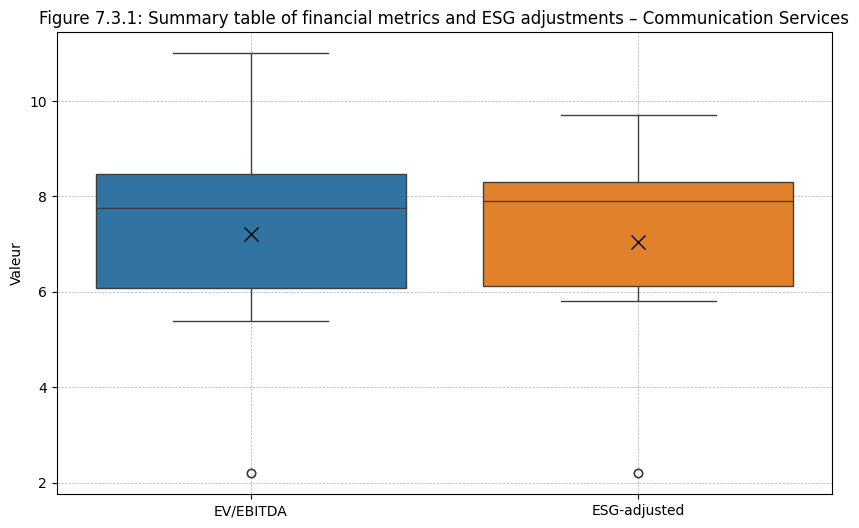

In [33]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot, showmeans=True, meanprops={"marker":"x",
                       "markerfacecolor":"black",
                       "markeredgecolor":"black",
                       "markersize":"10"})

# Ajoutez les titres et les labels pour correspondre au graphique original
plt.title('Figure 7.3.1: Summary table of financial metrics and ESG adjustments – Communication Services', fontsize=12)
plt.ylabel('Valeur')
plt.xlabel('') # Laissez l'axe x vide car les étiquettes sont gérées par le boxplot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Affichez le graphique
plt.show()

Saving Automobiles et composants .xlsx to Automobiles et composants  (5).xlsx
Corrélation (sans min, max, average, median) : -0.2931


/tmp/ipython-input-1224159930.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f"{y:,.1f}x" for y in plt.gca().get_yticks()])
/tmp/ipython-input-1224159930.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f"{x:,.1f}" for x in plt.gca().get_xticks()])


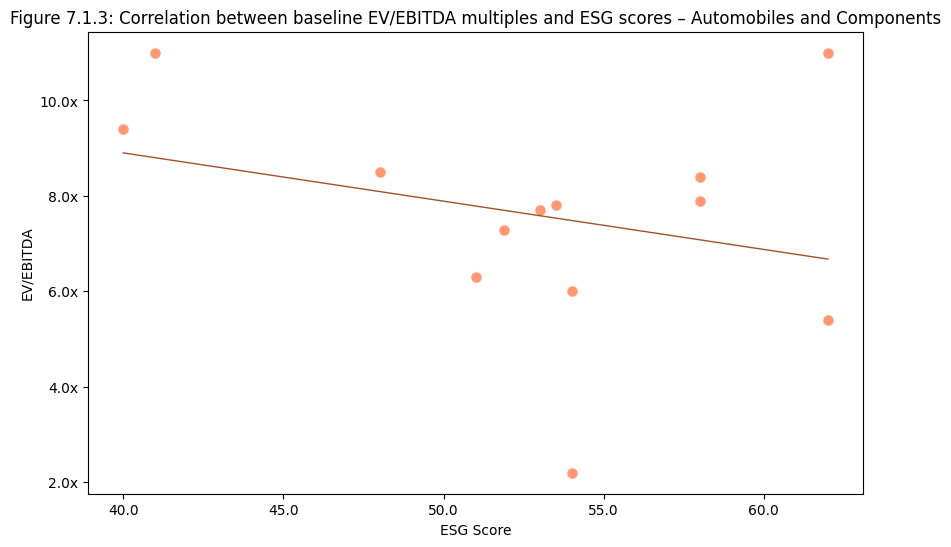

In [42]:
# Upload du fichier
uploaded = files.upload()

df.columns = df.columns.str.strip()

# Suppression des lignes contenant min, max, average, median dans la colonne 'Name'
df = df[~df['Name'].str.lower().isin(['min', 'max', 'average', 'median'])]

# Variables
x_col = 'ESG Score'
y_col = 'EV/EBITDA'

# Corrélation
correlation = df[y_col].corr(df[x_col])
print(f"Corrélation (sans min, max, average, median) : {correlation:.4f}")

# Création du graphique
plt.figure(figsize=(10, 6))

sns.regplot(
    data=df,
    x=x_col,
    y=y_col,
    scatter_kws={"color": "coral", "s": 70, "edgecolor": "white", "alpha": 0.8, "marker": "D"},
    line_kws={"color": "sienna", "linewidth": 1},
    ci=None
)

# Titre
plt.title('Figure 7.1.3: Correlation between baseline EV/EBITDA multiples and ESG scores – Automobiles and Components', fontsize=12)

# Format ticks
plt.gca().set_yticklabels([f"{y:,.1f}x" for y in plt.gca().get_yticks()])
plt.gca().set_xticklabels([f"{x:,.1f}" for x in plt.gca().get_xticks()])

plt.show()